# Testing different modules

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

import path
from modules import loss

In [18]:
import torch
import matplotlib.pyplot as plt

import path
from modules.model import Rotated_cINN
from modules.data import RotatedMNIST

dataset_name = "eval_default"
dataset_path = path.package_directory + "/datasets"

cinn = Rotated_cINN()
dataset = torch.load(f"{dataset_path}/test_{dataset_name}.pt")


data, targets, *_ = dataset[:100]
latent,_ = cinn.forward(data, targets)
reconstructed, _ = cinn.reverse(latent, targets)

torch.Size([28, 28])
tensor(1.5510e-07, grad_fn=<MeanBackward0>)
tensor(2.6226e-06, grad_fn=<MaxBackward1>)


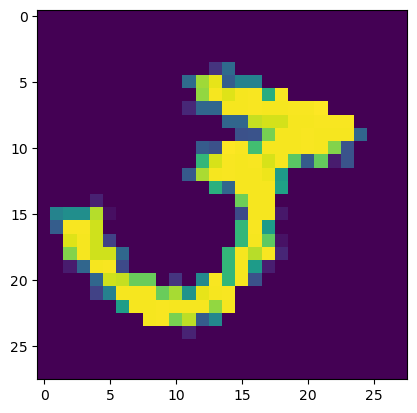

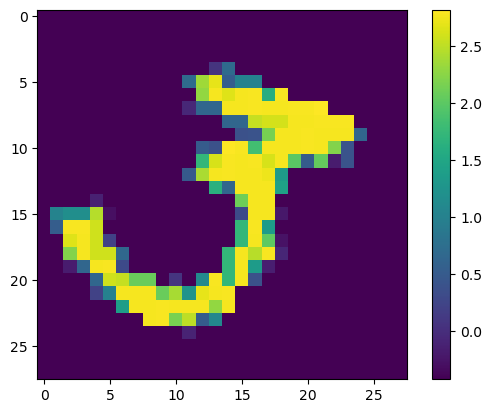

In [33]:
#print(data.shape, reconstructed.shape)
print(reconstructed[0, 0].shape)
print(torch.mean(torch.abs(data - reconstructed.squeeze())))
print(torch.max(torch.abs(data - reconstructed.squeeze())))

plt.imshow(data[0].detach().numpy())
plt.show()
plt.imshow(reconstructed[0, 0].detach().numpy())
plt.colorbar()

## Testing the mmd module

In [ ]:
N = 10000/14
D = 28**2
batch_P = torch.randn((N, D))
batch_Q = torch.randn((N, D))

### Testing different properties of the mmd functions

In [20]:
def testing_batch_size (func):
    """
    tests the influence of batch size on func output
    """
    
    N, M = 16, 20   # number of batch sizes, number of tries per size
    D = 30   # dimensions
    mmd_values = np.zeros((N, M))
    for i in range(N):
        for j in range(M):
            batch_P = torch.randn((2**i, D))
            batch_Q = torch.randn((2**i, D))

            mmd_values[i, j] = func(batch_P, batch_Q)

    mean = mmd_values.mean(1)   # shape=(N)
    std  = mmd_values.std(1, ddof=1)   # shape=(N)

    plt.figure(figsize=(6, 3))
    plt.title(f"Influence of batch size on mmd.{func.__name__}() output")
    plt.hlines(y=[0], xmin=0, xmax=N-1, linestyles="dashed", colors="gray")
    plt.errorbar(range(N), mean, std)
    plt.xticks(range(N), [f"{2**i}" for i in range(N)], rotation=90)
    plt.xlabel("batch size")
    plt.ylabel(f"mmd.{func.__name__}() value")
    plt.show()

In [21]:
def testing_dimensions (func):
    """
    tests the influence of number of dimensions on func output
    """
    
    N, M = 12, 20   # number of dimensions, number of tries per size
    B = 1024   # batch size
    mmd_values = np.zeros((N, M))
    for i in range(N):
        for j in range(M):
            batch_P = torch.randn((B, 2**i))
            batch_Q = torch.randn((B, 2**i))

            mmd_values[i, j] = func(batch_P, batch_Q)

    mean = mmd_values.mean(1)   # shape=(N)
    std  = mmd_values.std(1, ddof=1)   # shape=(N)

    plt.figure(figsize=(6, 3))
    plt.title(f"Influence of number of dimensions on mmd.{func.__name__}() output")
    plt.hlines(y=[0], xmin=0, xmax=N-1, linestyles="dashed", colors="gray")
    plt.errorbar(range(N), mean, std)
    plt.xticks(range(N), [f"{2**i}" for i in range(N)], rotation=90)
    plt.xlabel("number of dimensions")
    plt.ylabel(f"mmd.{func.__name__}() value")
    plt.show()

In [22]:
def testing_offset (func):
    """
    tests the influence of offsetting (changing the mean) of one distribution on func output
    """
    
    N, M = 30, 20   # number of offsets, number of tries per size
    B, D = 1024, 512   # batch size, dimensions
    mmd_values = np.zeros((N, M))
    lengths = [3*i/N  for i in range(N)]   # the linearly increasing offset vector's length
    for i in range(N):
        for j in range(M):
            offset = torch.randn((1, D))
            offset *= lengths[i] / np.linalg.norm(offset)   # scaling the offset to length

            batch_P = torch.randn((B, D)) + offset
            batch_Q = torch.randn((B, D))

            mmd_values[i, j] = func(batch_P, batch_Q)

    mean = mmd_values.mean(1)   # shape=(N)
    std  = mmd_values.std(1, ddof=1)   # shape=(N)

    plt.figure(figsize=(6, 3))
    plt.title(f"Influence of offsets on mmd.{func.__name__}() output")
    plt.hlines(y=[0], xmin=0, xmax=N-1, linestyles="dashed", colors="gray")
    plt.errorbar(range(N), mean, std)
    plt.xticks(range(N), lengths, rotation=90)
    plt.xlabel("offset length")
    plt.ylabel(f"mmd.{func.__name__}() value")
    plt.show()

In [23]:
def testing_variance (func):
    """
    tests the influence of scaling the variance of one distribution on func output
    """
    
    N, M = 30, 20   # number of variances, number of tries per size
    B, D = 1024, 512   # batch size, dimensions
    mmd_values = np.zeros((N, M))
    stds = np.sqrt(9*np.arange(N)/N)   # the linearly increasing the variation
    for i in range(N):
        for j in range(M):
            batch_P = torch.randn((B, D)) * stds[i]  # scaling the distribution 
            batch_Q = torch.randn((B, D))

            mmd_values[i, j] = func(batch_P, batch_Q)

    mean = mmd_values.mean(1)   # shape=(N)
    std  = mmd_values.std(1, ddof=1)   # shape=(N)

    plt.figure(figsize=(6, 3))
    plt.title(f"Influence of variance on mmd.{func.__name__}() output")
    plt.hlines(y=[0], xmin=0, xmax=N-1, linestyles="dashed", colors="gray")
    plt.errorbar(range(N), mean, std)
    plt.xticks(range(N), [f"{std**2:.2f}" for std in stds], rotation=90)
    plt.xlabel("variance")
    plt.ylabel(f"mmd.{func.__name__}() value")
    plt.show()

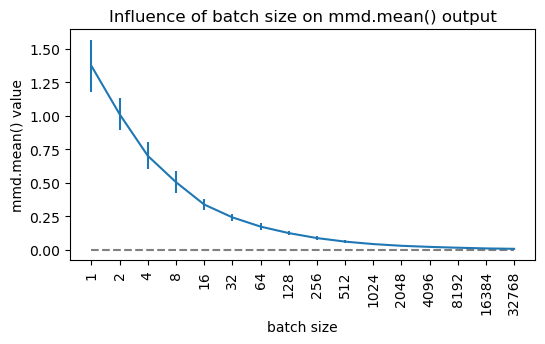

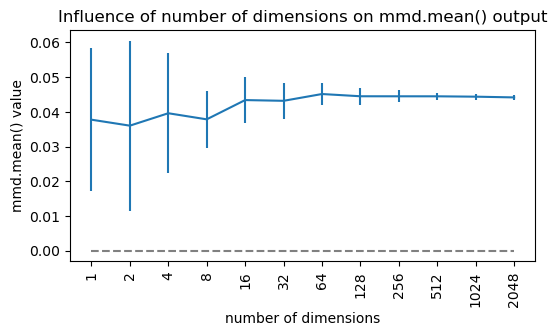

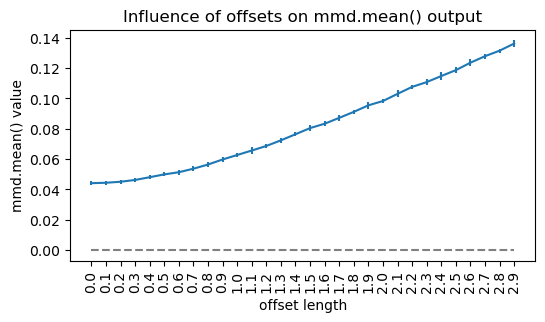

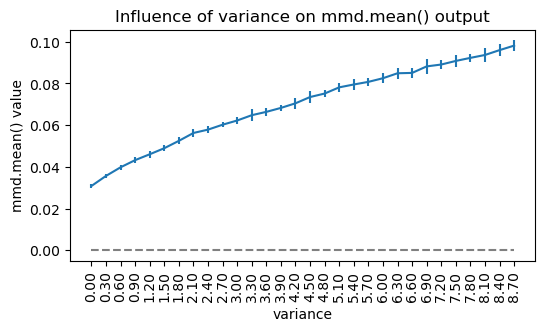

In [24]:
testing_batch_size(loss.mmd.mean)
testing_dimensions(loss.mmd.mean)
testing_offset(loss.mmd.mean)
testing_variance(loss.mmd.mean)

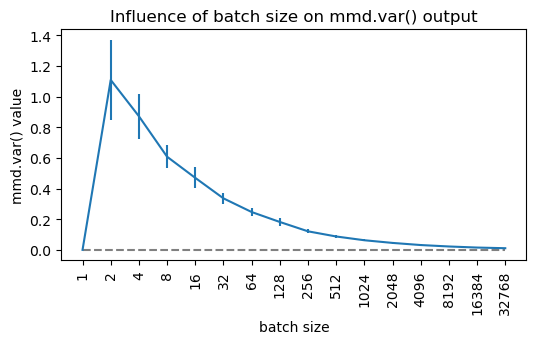

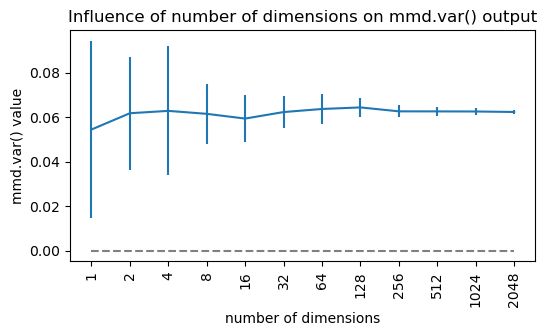

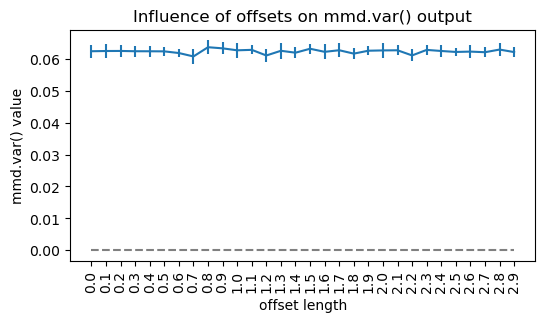

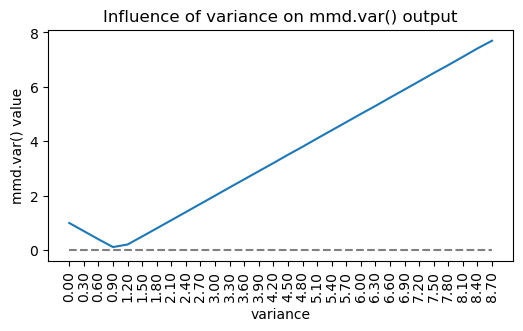

In [25]:
testing_batch_size(loss.mmd.var)
testing_dimensions(loss.mmd.var)
testing_offset(loss.mmd.var)
testing_variance(loss.mmd.var)

### checking for correct behavior

In [2]:
batch_P = torch.randn((100, 30))
batch_Q = torch.randn((100, 30))

mmd_mean = loss.mmd.mean(batch_P, batch_Q)
mmd_var = loss.mmd.var(batch_P, batch_Q)

print(type(mmd_mean), type(mmd_var))
print(mmd_mean.shape, mmd_var.shape)
print(mmd_mean, mmd_var)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
() ()
0.15407722 0.23976961


### testing documentation

In [3]:
help(loss.mmd.mean)

Help on function mean in module modules.mmd:

mean(batch_P: torch.Tensor, batch_Q: torch.Tensor) -> float
    computes the maximum mean discrepancy MMD(P, Q) of the distributions P and Q by approximating them with a batch of samples from each.
    This one computes the differences between means for each dimension.
    
    Arguments
    ---------
    batch_P : torch.Tensor, shape=(N, D)
    batch_Q : torch.Tensor, shape=(N, D)
    
    N = batch size
    D = number of dimensions of each sample
    
    Returns
    -------
    mmd : float, >=0



In [4]:
help(loss.mmd.var)

Help on function var in module modules.mmd:

var(batch_P: torch.Tensor, batch_Q: torch.Tensor) -> float
    computes the maximum mean discrepancy MMD(P, Q) of the distributions P and Q by approximating them with a batch of samples from each.
    This one computes the differences between variances for each dimension.
    
    Arguments
    ---------
    batch_P : torch.Tensor, shape=(N, D)
    batch_Q : torch.Tensor, shape=(N, D)
    
    N = batch size
    D = number of dimensions of each sample
    
    Returns
    -------
    mmd : float, >=0

